In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [147]:
stock_name = 'btc-usd'.upper()
df1 = pd.read_csv(f'data/{stock_name}.csv', parse_dates=True)
df1.set_index('Date', inplace=True)
df1 = df1[['stock_price', 'marker_buy', 'marker_sell', 'portfolio_value']]
df1.columns = ['Stock price', 'Buy', 'Sell', 'Portfolio value']
bt_returns = df1['Portfolio value'].pct_change() + 1
price = df1['Stock price'].pct_change() + 1
bt_returns = bt_returns.fillna(1)
price = price.fillna(1)

1

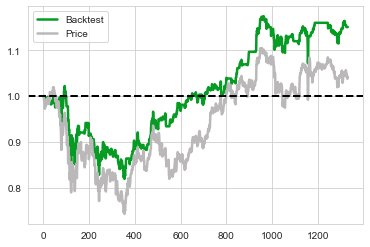

In [76]:
sns.set_style('whitegrid')
plt.plot(bt_returns.values, lw=2.5, c='#069c24', label='Backtest')
plt.plot(price.values, lw=2.5, c='#bab8b8', label='Price')
plt.legend()
plt.axhline(1, ls='--', c='black', lw=2)

In [82]:
def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['Portfolio value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change()
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown'] / df['cum_roll_max']
    return df['drawdown_pct'] * -100

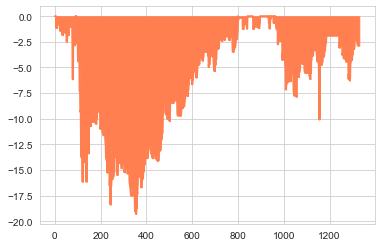

In [152]:
plt.fill_between(range(len(df1)), dd, 0, color='coral')
plt.plot(dd[1:], c='coral', lw=2, )

In [116]:
dd.shape

(1331,)

In [117]:
x.shape

(200,)

In [131]:
dd

array([        nan, -0.        , -0.        , ..., -2.85404982,
       -2.85404982, -2.85404982])

In [146]:
price

Date
2021-02-20 18:30:00+00:00    1.000000
2021-02-20 19:30:00+00:00    0.998450
2021-02-20 20:00:00+00:00    0.997953
2021-02-20 20:30:00+00:00    0.998496
2021-02-20 21:00:00+00:00    0.996070
                               ...   
2021-03-22 12:30:00+00:00    0.996728
2021-03-22 13:00:00+00:00    1.000408
2021-03-22 13:30:00+00:00    0.994489
2021-03-22 14:00:00+00:00    0.999777
2021-03-22 14:30:00+00:00    1.003857
Name: Stock price, Length: 1331, dtype: float64